In [89]:
import cv2
import os
import pyautogui

from matplotlib import pyplot as plt
import numpy as np
import time

from IPython.display import Image

In [2]:
# 집에 가서 리플레이 0~9까지의 이미지 저장 및 슬랙에 내게 보내놓기
# 집에 가서 리플레이 
# 리플레이 crawling 작성

In [3]:
img1_path = "images/abc.png"
img2_path = "images/abcd.png"

img1 = cv2.imread(img1_path, cv2.IMREAD_COLOR)
img2 = cv2.imread(img2_path)
# img2 = img[:,:,::-1]

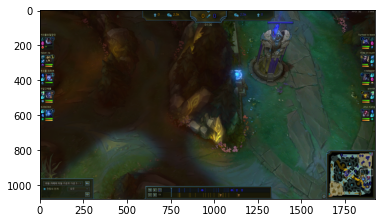

In [4]:
plt.imshow(img1)

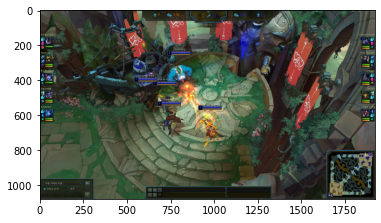

In [5]:
# plt.imshow(img)
plt.imshow(img2)

In [6]:
# cv2.imshow('', img1)

In [7]:
img1_gray = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2_gray = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

In [8]:
blur1 = cv2.GaussianBlur(img1_gray, ksize=(3, 3), sigmaX=0)
blur2 = cv2.GaussianBlur(img2_gray, ksize=(3, 3), sigmaX=0)

ret1, thresh1 = cv2.threshold(blur1, 127, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(blur2, 127, 255, cv2.THRESH_BINARY)

In [9]:
# plt.figure(figsize=(16, 12))
# plt.imshow(blur1)

In [10]:
blur1_time = blur1[75:95, 940:990]
blur2_time = blur2[75:95, 940:990]

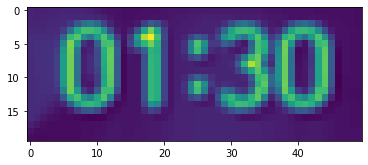

In [11]:
plt.imshow(blur1_time)

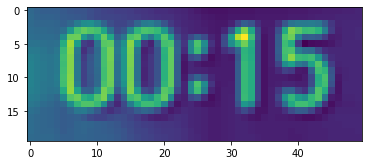

In [12]:
plt.imshow(blur2_time)

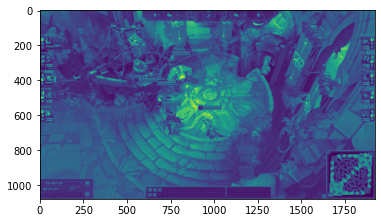

In [13]:
plt.imshow(blur2)

In [14]:
# replay_id = "RZTuBdx3fezaid+KtXGoEm6udaD+uUx7 5474261454"
# replay_execution_command = f"""
# if test -d  /Applications/League\ of\ Legends.app/Contents/LoL/Game/ ; then cd /Applications/League\ of\ Legends.app/Contents/LoL/Game/ && chmod +x ./LeagueofLegends.app/Contents/MacOS/LeagueofLegends ; else cd /Applications/League\ of\ Legends.app/Contents/LoL/RADS/solutions/lol_game_client_sln/releases/ && cd $(ls -1vr -d */ | head -1) && cd deploy && chmod +x ./LeagueofLegends.app/Contents/MacOS/LeagueofLegends ; fi && riot_launched=true ./LeagueofLegends.app/Contents/MacOS/LeagueofLegends "spectator kr3.spectator.op.gg:80 GuBn0JNypjkmdRKS/WSckOBE9c9FoWcb 5476558459 KR" "-UseRads" "-Locale=ko_KR" "-GameBaseDir=.."
# """
# os.system(replay_execution_command)

In [15]:
# replay_id = "RZTuBdx3fezaid+KtXGoEm6udaD+uUx7 5474261454"
# replay_execution_command = f"""
# if test -d  /Applications/League\ of\ Legends.app/Contents/LoL/Game/ ; then cd /Applications/League\ of\ Legends.app/Contents/LoL/Game/ && chmod +x ./LeagueofLegends.app/Contents/MacOS/LeagueofLegends ; else cd /Applications/League\ of\ Legends.app/Contents/LoL/RADS/solutions/lol_game_client_sln/releases/ && cd $(ls -1vr -d */ | head -1) && cd deploy && chmod +x ./LeagueofLegends.app/Contents/MacOS/LeagueofLegends ; fi && riot_launched=true ./LeagueofLegends.app/Contents/MacOS/LeagueofLegends "spectator kr3.spectator.op.gg:80 {replay_id} KR" "-UseRads" "-Locale=ko_KR" "-GameBaseDir=.."
# """
# os.system(replay_execution_command)

# while True:
#     print("시작")
#     time.sleep(5)
#     pyautogui.screenshot(f"images/sample.png")
#     print("성공")

# 숫자인식기

In [16]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [18]:
learning_rate   = 0.01
training_epochs = 15
batch_size      = 100

In [20]:
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

In [21]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [22]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [23]:
# CNN 모델 정의
model = CNN().to(device)

In [24]:
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [25]:
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 600


In [26]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

/opt/homebrew/Caskroom/miniforge/base/envs/nano/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[Epoch:    1] cost = 0.321684778
[Epoch:    2] cost = 0.133421615
[Epoch:    3] cost = 0.124543317
[Epoch:    4] cost = 0.120062694
[Epoch:    5] cost = 0.126077235
[Epoch:    6] cost = 0.12010587
[Epoch:    7] cost = 0.120311879
[Epoch:    8] cost = 0.121879593
[Epoch:    9] cost = 0.11218702
[Epoch:   10] cost = 0.126993492
[Epoch:   11] cost = 0.117882371
[Epoch:   12] cost = 0.116523273
[Epoch:   13] cost = 0.11593838
[Epoch:   14] cost = 0.118124239
[Epoch:   15] cost = 0.131694451


In [ ]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

In [133]:
# a, b = 0, 0
# for x, y in data_loader:
#     a, b = x, y
#     break

In [149]:
# # 3차원
# a[0][0][0]

# # 1차원
# b

a.to(device)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [152]:
b

tensor([5, 6, 2, 4, 2, 7, 9, 8, 4, 2, 4, 1, 9, 0, 0, 7, 1, 2, 0, 1, 7, 1, 2, 0,
        2, 8, 2, 1, 6, 6, 4, 8, 5, 9, 5, 2, 4, 1, 5, 0, 3, 0, 2, 3, 3, 3, 0, 1,
        2, 0, 4, 0, 1, 6, 2, 4, 1, 0, 2, 3, 7, 5, 0, 1, 4, 7, 9, 0, 1, 8, 9, 3,
        8, 3, 5, 2, 6, 5, 8, 5, 7, 0, 2, 8, 9, 6, 4, 6, 8, 3, 3, 1, 7, 3, 5, 9,
        1, 7, 7, 7])

# 매크로
- m1 디스플레이 1440 * 900

In [97]:
def get_mouse_position(interval=2):
    time.sleep(interval)
    position = pyautogui.position()
    
    return position

In [123]:
get_mouse_position(interval=3)

# # 현재 디스플레이 크기
# print(pyautogui.size())

# # x, y 좌표
# print(position.x)
# print(position.y)

Point(x=1053, y=171)

In [124]:
summoner_search_bar = pyautogui.Point(904, 159)
match_record        = pyautogui.Point(x=487, y=154)
close_button        = pyautogui.Point(x=1105, y=137)
delete_search       = pyautogui.Point(x=1053, y=171)

replay_x           = 820
replay_y           = 310
replay_y_tolerance = 80
replay_buttons     = [pyautogui.Point(replay_x, replay_y + (replay_y_tolerance * index)) for index in range(6)]

In [150]:
time.sleep(1.5)
pyautogui.moveTo(summoner_search_bar)
pyautogui.click()
pyautogui.write('hide on bush')
pyautogui.press('enter')

time.sleep(2)
pyautogui.moveTo(match_record)
pyautogui.click()

# for replay_button in replay_buttons:
#     pyautogui.moveTo(replay_button)
#     time.sleep(0.5)
#     pyautogui.click()

In [53]:
# 마우스 이동 (x 좌표, y 좌표)
# pyautogui.moveTo(500, 900)

# # 마우스 이동 (x 좌표, y 좌표 2초간)
# pyautogui.moveTo(100, 100, 2)  

# # 마우스 이동 ( 현재위치에서 )
# pyautogui.moveRel(200, 300, 2)

# # 마우스 클릭
# pyautogui.click()

# # 2초 간격으로 2번 클릭
# pyautogui.click(clicks= 2, interval=2)

# # 더블 클릭
# pyautogui.doubleClick()

# # 오른쪽 클릭
# pyautogui.click(button='right')

# # 스크롤하기 
# pyautogui.scroll(10)

# # 드래그하기
# pyautogui.drag(0, 300, 1, button='left')

# pyautogui.press('enter', presses=3, interval=3) # enter 키를 3초에 한번씩 세번 입력합니다.

# pyautogui.write('hello world!', interval=0.25) # 각 문자를 0.25마다 타이핑합니다. 

In [ ]:
# pyautogui.screenshot(f"images/sample.png")

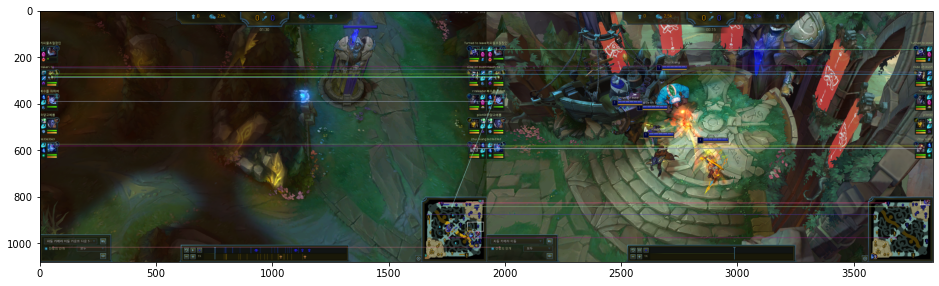

In [151]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

bf = cv2.BFMatcher()

matches = bf.knnMatch(des1, des2, k=2)
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
    
    
plt.figure(figsize=(16, 12))
knn_image = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)
plt.imshow(knn_image)
plt.show()